[{'name': 'id', 'path': []}, {'name': 'vbiasn', 'path': []}, {'name': 'vbiasnd', 'path': []}, {'name': 'vbiasp1', 'path': []}, {'name': 'vbiasp2', 'path': []}, {'name': 'vdd', 'path': []}, {'name': 'net64', 'path': [[27680, 14616, 27680, 13440], [27680, 13440, 39040, 13440], [39040, 13440, 39040, 3192], [39040, 3192, 39200, 3192], [32640, 13440, 32640, 13440], [32640, 13440, 32640, 13944], [32840, 13944, 32440, 13944], [32640, 13944, 32640, 13608]]}, {'name': 'net66', 'path': [[27840, 14784, 27840, 12600], [27840, 12600, 19872, 12600], [19872, 12600, 19872, 10080], [20232, 10080, 19512, 10080], [19872, 10080, 19872, 3168], [20088, 3168, 19368, 3168], [19584, 3196, 19584, 2996], [19612, 3024, 19332, 3024], [19360, 3150, 19360, 2730], [19560, 2856, 19160, 2856], [19360, 2856, 19360, 3192], [27840, 13272, 27840, 13272], [27840, 13272, 28160, 13272], [28160, 13482, 28160, 13062], [28160, 13272, 28160, 13272]]}, {'name': 'voutn', 'path': [[24480, 19656, 22560, 19656], [22560, 19656, 22560, 

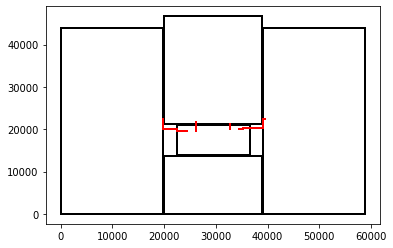

voutn
[[24480, 19656, 22560, 19656], [22560, 19656, 22560, 20160], [22560, 20160, 19680, 20160], [19680, 20160, 19680, 22512], [19680, 22512, 19680, 22512], [26240, 19656, 26240, 19656], [26240, 19656, 26240, 21672]]
voutp
[[34560, 19992, 35200, 19992], [35200, 19980, 35200, 20340], [35200, 20328, 39200, 20328], [39200, 20328, 39200, 22512], [39200, 22512, 39520, 22512], [32640, 19992, 32640, 19992], [32640, 19992, 32640, 21336], [32640, 21336, 32640, 21336]]


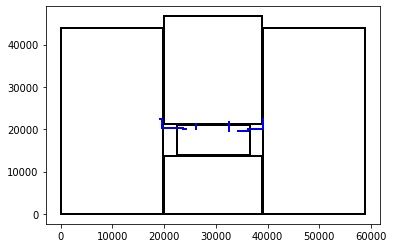

In [24]:
import json
import matplotlib.pyplot as plt

def read_data(filename):
    read_file = filename
    data = json.load(open(read_file,'r'))
    Blocks = data["blocks"]
    Path = data["wires"]
    
    return Blocks,Path

def plot_detail_routing(Blocks,Path,name1,name2):
    
    plt.figure()
    
    #plot_box(node_box['LLx'], node_box['LLy'],node_box['URx'],node_box['URy'],'r')
    
    for block in Blocks:
        
        plot_box(block["position"][0],block["position"][1],block["position"][2],block["position"][3],'k')        
    
    
    for net in Path:
    
        if net['name']!=name1 and net['name']!=name2:
            continue
     
        print(net['name'])
        print(net['path'])
        
        for path in net['path']:
            plot_line(path[0],path[1],path[2],path[3],'r')
            
        #for stiner_node in net['steiner_node']:
            #plot_dot(stiner_node['x'],stiner_node['y'],'g')
            
    plt.savefig("sym_routing", dpi=300)
    
    plt.show()
    
def plot_detail_routing_sym(Blocks,Path,name1,name2,center):
    
    plt.figure()
    
    #plot_box(node_box['LLx'], node_box['LLy'],node_box['URx'],node_box['URy'],'r')
    
    for block in Blocks:
        
        plot_box(block["position"][0],block["position"][1],block["position"][2],block["position"][3],'k')        
    
    
    for net in Path:
    
        if net['name']!=name1 and net['name']!=name2:
            continue
     
        print(net['name'])
        print(net['path'])
        
        for path in net['path']:
            plot_line(2*center-path[2],path[1],2*center-path[0],path[3],'b')
            
        #for stiner_node in net['steiner_node']:
            #plot_dot(stiner_node['x'],stiner_node['y'],'g')
    
    plt.show()
    
def plot_box(llx,lly,urx,ury,c):
    plt.plot([llx,urx], [lly,lly], lw=2, color=c)
    plt.plot([urx,urx], [lly,ury], lw=2, color=c)
    plt.plot([urx,llx], [ury,ury], lw=2, color=c)
    plt.plot([llx,llx], [lly,ury], lw=2, color=c)
    
def plot_line(llx,lly,urx,ury,c):
    plt.plot([llx,urx], [lly,ury], lw=2, color=c)
    
def plot_dot(x,y,c):
    plt.plot(x,y, 'o', color=c)


Blocks,Path=read_data("Results/switched_capacitor_filter_DetailRoute_0.json")
print(Path)

plot_detail_routing(Blocks,Path,"voutn","voutp")

plot_detail_routing_sym(Blocks,Path,"voutn","voutp",29400)

